In [58]:
import pandas as pd
data = pd.read_csv('german_credit_data.csv', sep=',')
from funpymodeling import status, freq_tbl, profiling_num
data.shape

(1000, 10)

In [59]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, 
vacation/others)

In [60]:
data['Job'] = data['Job'].replace({
    0: 'unskilled and non-resident', 
    1: 'unskilled and resident', 
    2: 'skilled', 
    3: 'highly skilled'
})

In [61]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.000,0,0.0,53,int64
1,Sex,0,0.000,0,0.0,2,object
2,Job,0,0.000,0,0.0,4,object
3,Housing,0,0.000,0,0.0,3,object
4,Saving_accounts,183,0.183,0,0.0,4,object
5,Checking_account,394,0.394,0,0.0,3,object
6,Credit_amount,0,0.000,0,0.0,921,int64
7,Duration,0,0.000,0,0.0,33,int64
8,Purpose,0,0.000,0,0.0,8,object
9,Risk,0,0.000,0,0.0,2,object


In [62]:
max_unique_value = data.select_dtypes(include=['object']).nunique().max()
for columna in data.columns:
    valores_unicos = data[columna].unique()
    if len(valores_unicos) <= max_unique_value:
        print(f"Valores únicos en la columna {columna}: \n {valores_unicos} \n")

Valores únicos en la columna Sex: 
 ['male' 'female'] 

Valores únicos en la columna Job: 
 ['skilled' 'unskilled and resident' 'highly skilled'
 'unskilled and non-resident'] 

Valores únicos en la columna Housing: 
 ['own' 'free' 'rent'] 

Valores únicos en la columna Saving_accounts: 
 [nan 'little' 'quite rich' 'rich' 'moderate'] 

Valores únicos en la columna Checking_account: 
 ['little' 'moderate' nan 'rich'] 

Valores únicos en la columna Purpose: 
 ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others'] 

Valores únicos en la columna Risk: 
 ['good' 'bad'] 



In [63]:
freq_tbl(data)

      Sex  frequency  percentage  cumulative_perc
0    male        690        0.69             0.69
1  female        310        0.31             1.00

----------------------------------------------------------------

                          Job  frequency  percentage  cumulative_perc
0                     skilled        630       0.630            0.630
1      unskilled and resident        200       0.200            0.830
2              highly skilled        148       0.148            0.978
3  unskilled and non-resident         22       0.022            1.000

----------------------------------------------------------------

  Housing  frequency  percentage  cumulative_perc
0     own        713       0.713            0.713
1    rent        179       0.179            0.892
2    free        108       0.108            1.000

----------------------------------------------------------------

  Saving_accounts  frequency  percentage  cumulative_perc
0          little        603       0.603 

In [64]:
profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Age,35.546,11.375469,0.320021,20.00,22.00,27.0,33.0,42.00,60.0,67.01
1,Credit_amount,3271.258,2822.736876,0.862890,425.83,708.95,1365.5,2319.5,3972.25,9162.7,14180.39
2,Duration,20.903,12.058814,0.576894,6.00,6.00,12.0,18.0,24.00,48.0,60.00


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Credit_amount'}>],
       [<Axes: title={'center': 'Duration'}>, <Axes: >]], dtype=object)

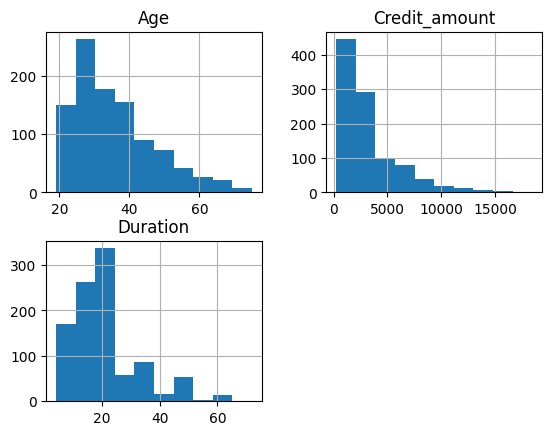

In [65]:
data.hist()

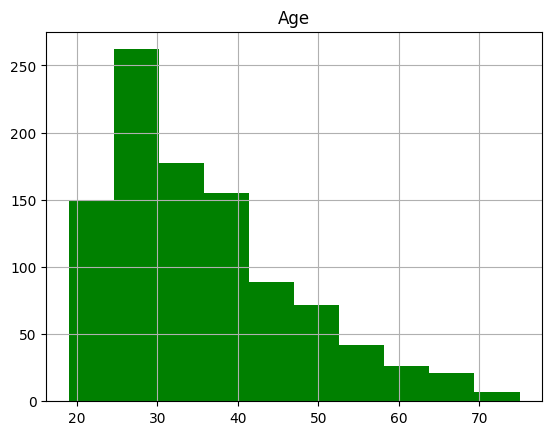

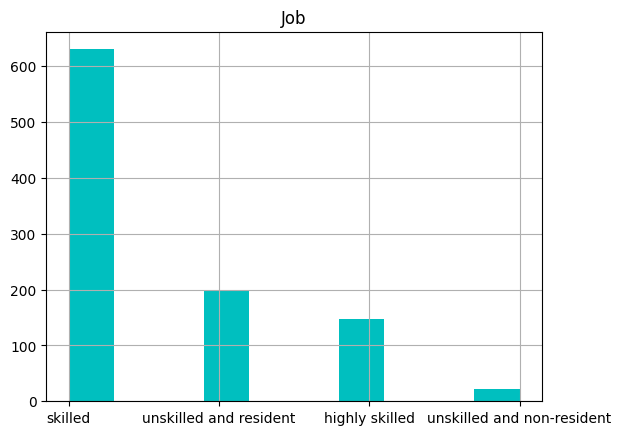

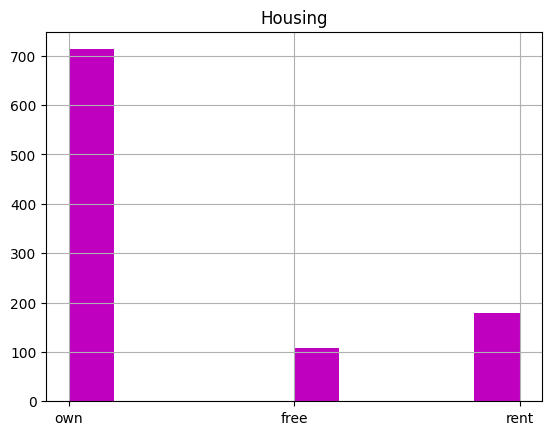

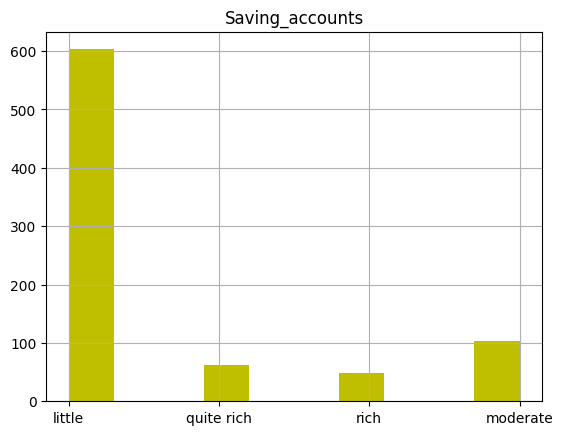

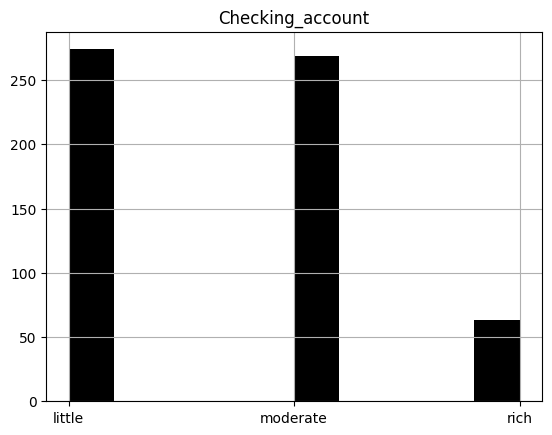

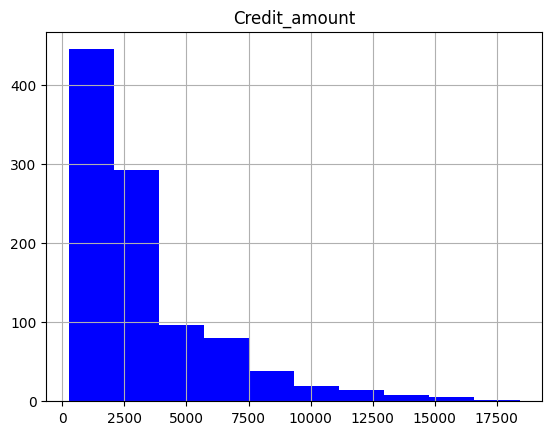

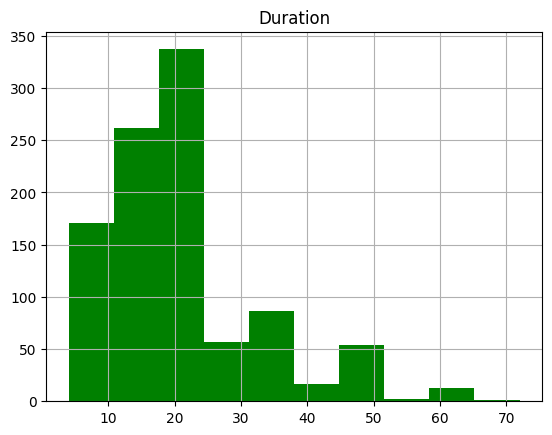

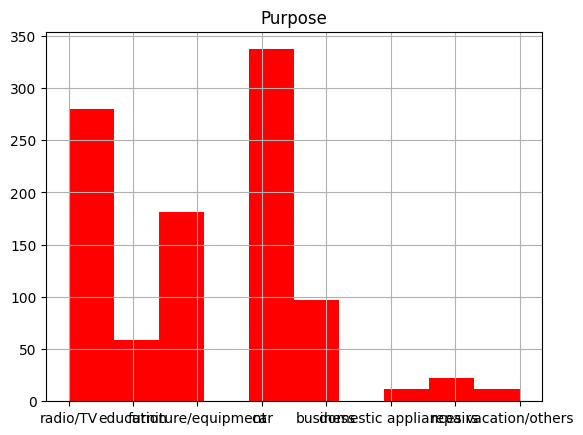

In [66]:
import matplotlib.pyplot as plt

# List of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the DataFrame columns
cols = data.columns

# Loop over the DataFrame columns
for i, col in enumerate(cols, start=1):
    # Check if the column has more than 2 unique values
    if data[col].nunique() > 2:
        # Create a new subplot for each column
        fig, ax = plt.subplots()
        # Plot the histogram for the column
        data[col].hist(ax=ax, color=colors[i % len(colors)])  # Use a color from the list
        ax.set_title(col)  # Set the title of the histogram to the column name
        plt.show()

<Axes: xlabel='Purpose'>

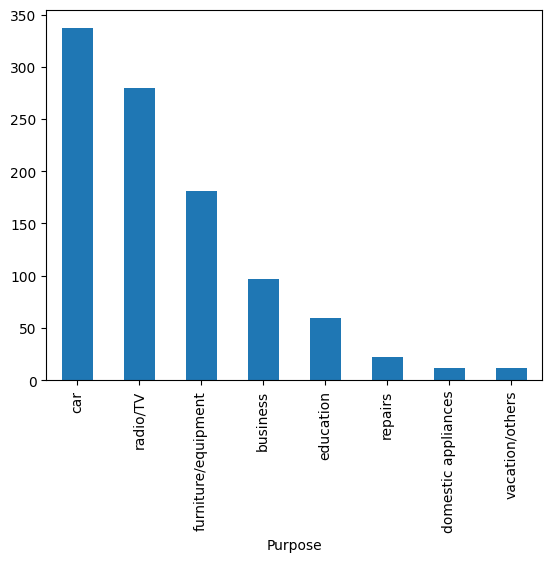

In [67]:
data['Purpose'].value_counts().plot(kind='bar')

In [68]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [69]:
data1 = data[data['Risk'] == 'bad']
data1.shape

(300, 10)

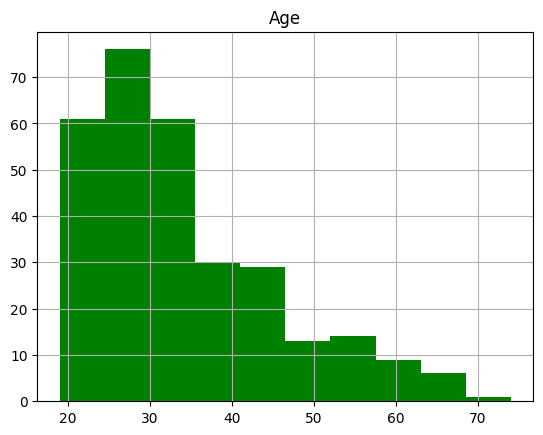

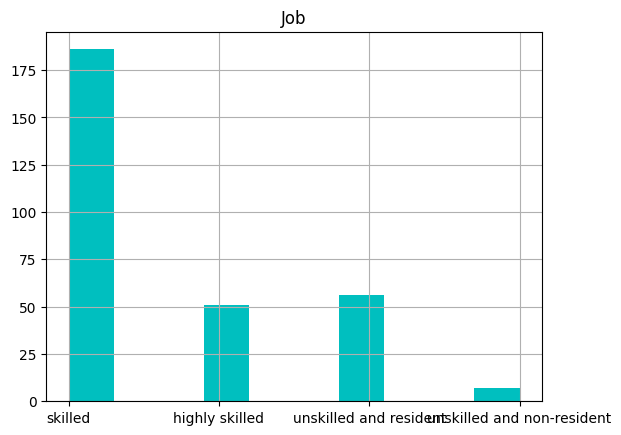

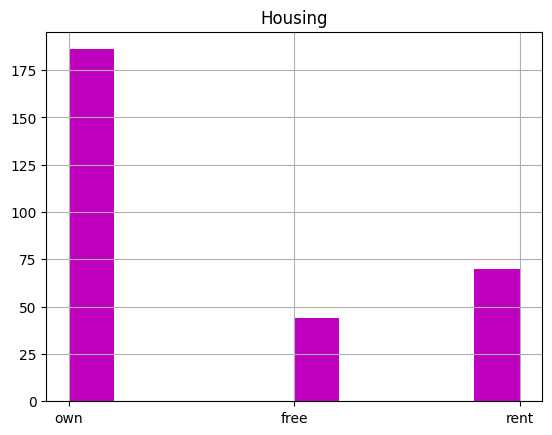

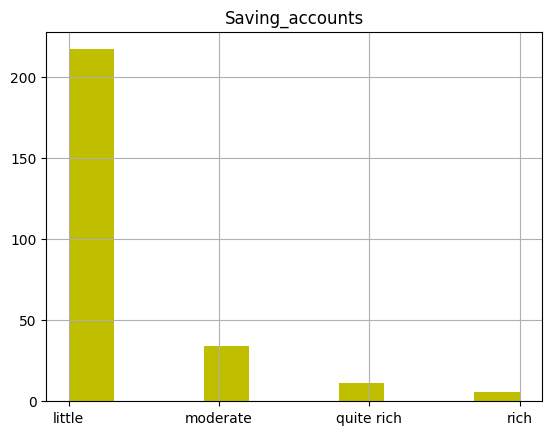

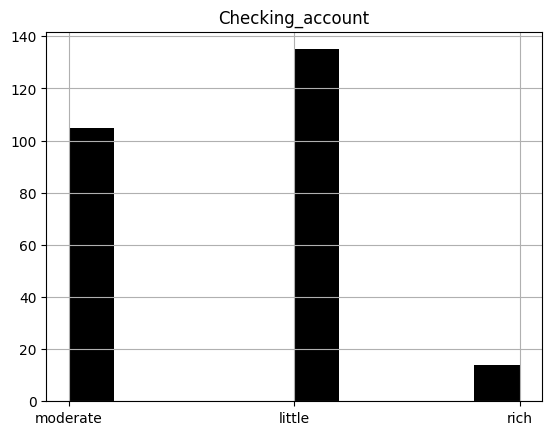

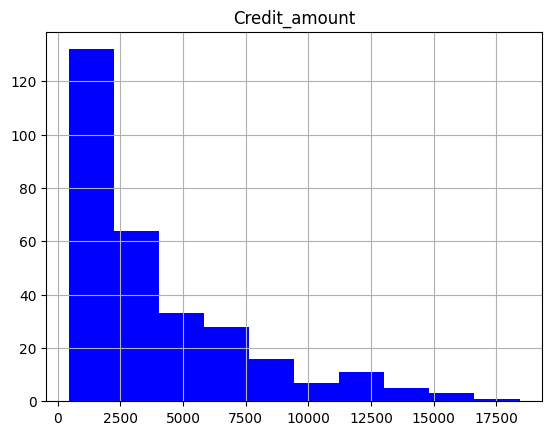

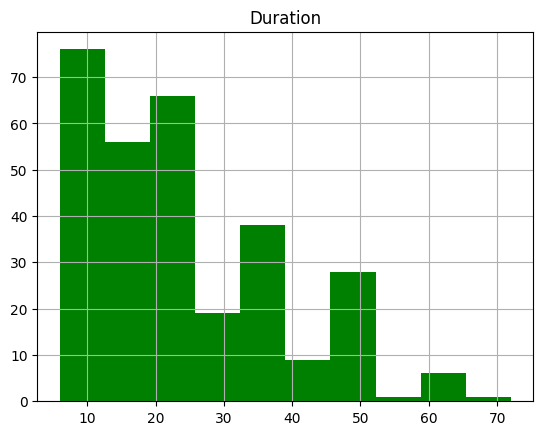

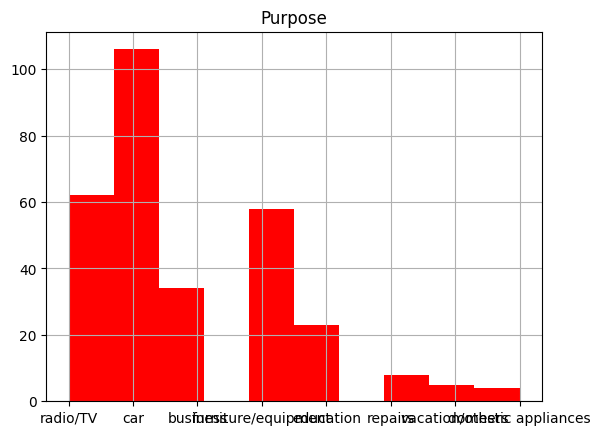

In [70]:
import matplotlib.pyplot as plt

# List of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the DataFrame columns
cols = data1.columns

# Loop over the DataFrame columns
for i, col in enumerate(cols, start=1):
    # Check if the column has more than 2 unique values
    if data1[col].nunique() > 2:
        # Create a new subplot for each column
        fig, ax = plt.subplots()
        # Plot the histogram for the column
        data1[col].hist(ax=ax, color=colors[i % len(colors)])  # Use a color from the list
        ax.set_title(col)  # Set the title of the histogram to the column name
        plt.show()

<Axes: xlabel='Purpose'>

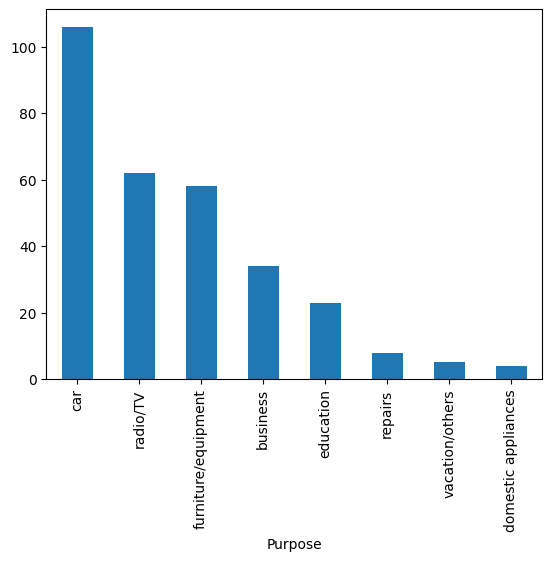

In [71]:
data1['Purpose'].value_counts().plot(kind='bar')

In [72]:
data0 = data[data['Risk'] == 'good']
data0.shape

(700, 10)

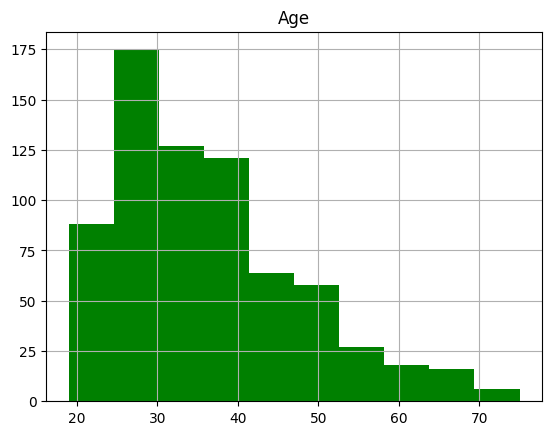

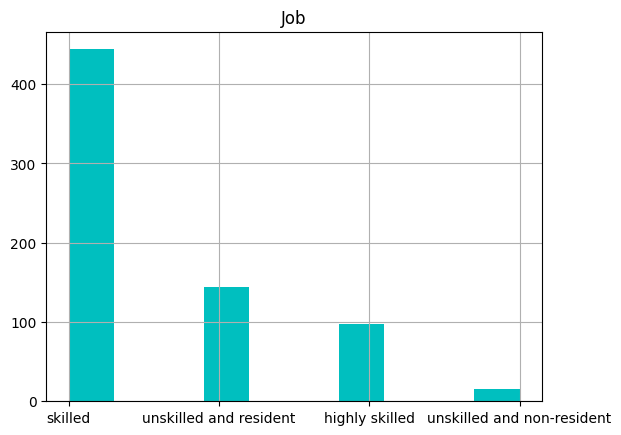

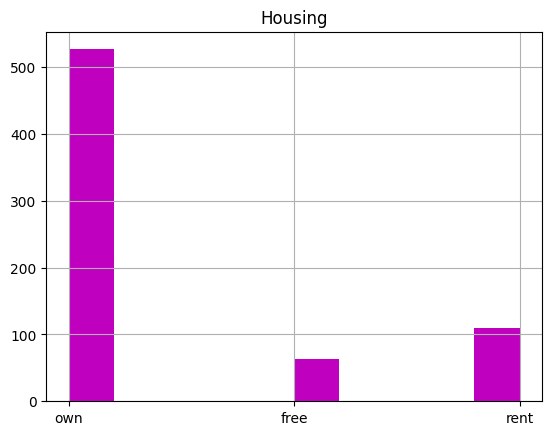

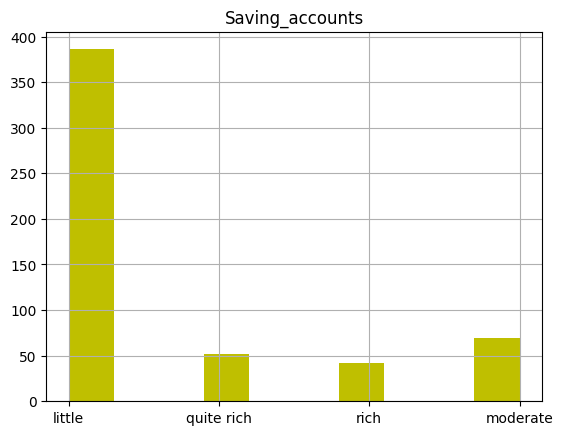

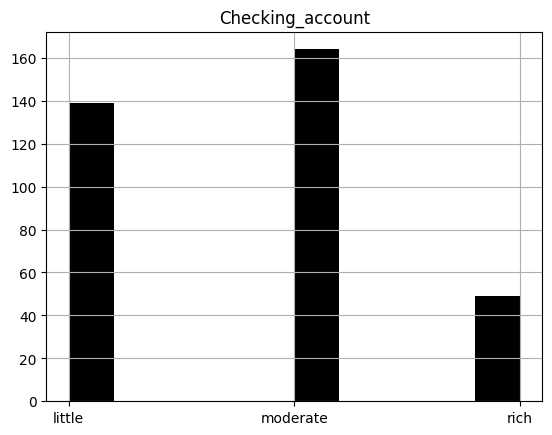

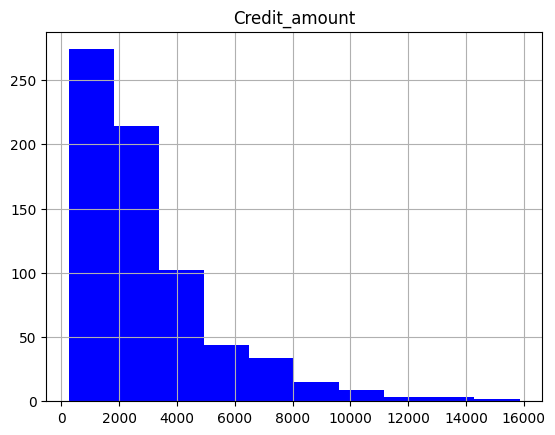

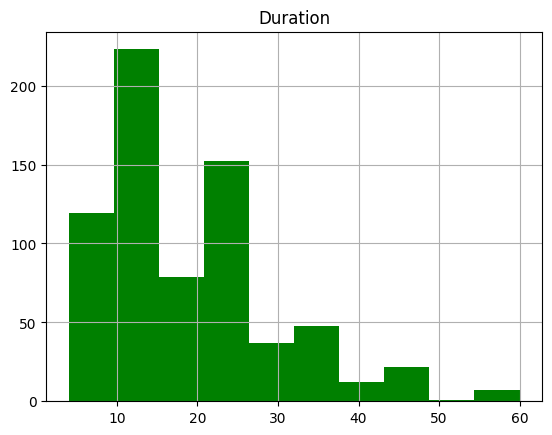

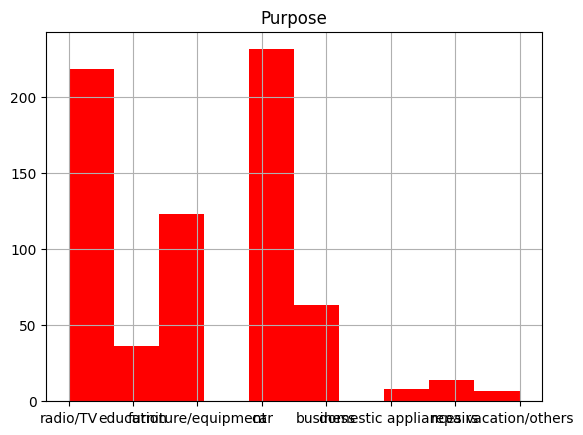

In [73]:
import matplotlib.pyplot as plt

# List of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the DataFrame columns
cols = data0.columns

# Loop over the DataFrame columns
for i, col in enumerate(cols, start=1):
    # Check if the column has more than 2 unique values
    if data0[col].nunique() > 2:
        # Create a new subplot for each column
        fig, ax = plt.subplots()
        # Plot the histogram for the column
        data0[col].hist(ax=ax, color=colors[i % len(colors)])  # Use a color from the list
        ax.set_title(col)  # Set the title of the histogram to the column name
        plt.show()

<Axes: xlabel='Purpose'>

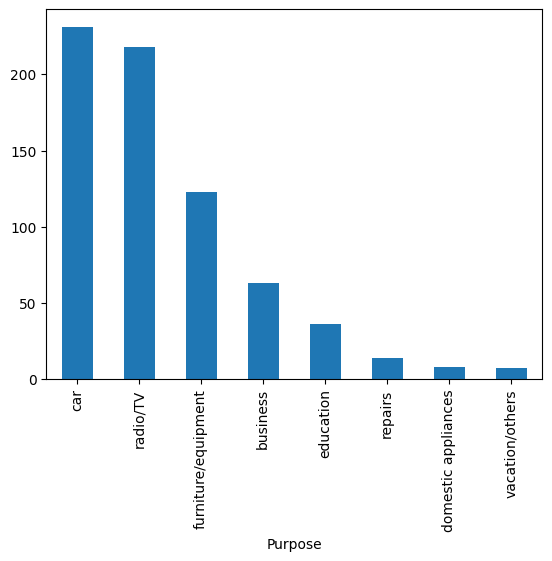

In [74]:
data0['Purpose'].value_counts().plot(kind='bar')